In [1]:
install.packages("devtools")
install.packages("dplyr")
install.packages("rmarkdown")
install.packages("ggplot2")
install.packages("broom")
install.packages("gridExtra")
install.packages("shiny")
install.packages("cubature")
install.packages("tidyr")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [87]:
library(ggplot2)
library(dplyr)
library(tidyverse)
library(reshape2)

In [88]:
load("../data/brfss2013")
df <- brfss2013

In [8]:
nrow(brfss2013)

[1] 491775

### Data

### Research Questions

##### Research Question (RQ) 1
    a) Does household income correlate with a decision to not seek medical attention when needed?
    b) Is there a decision difference between the sexes?
    
##### Reason for Interest
    I don't think I've seen a statistical analysis addressing this specific correlation, though I'm 
    sure it has been done. I'm curious to see if there is a decision difference amongst the sexes, 
    about medical care, regarding their financial situation.

##### Exploratory Data Analysis (EDA) for RQ1

In [103]:
med <- (
    
    df %>%  
    select(medcost, income2, X_state, sex) %>%
    drop_na()
    
)

In [104]:
head(med)

medcost,income2,X_state,sex
No,"Less than $75,000",Alabama,Female
No,"$75,000 or more",Alabama,Female
No,"$75,000 or more",Alabama,Female
No,"Less than $75,000",Alabama,Female
No,"Less than $50,000",Alabama,Male
No,"$75,000 or more",Alabama,Female


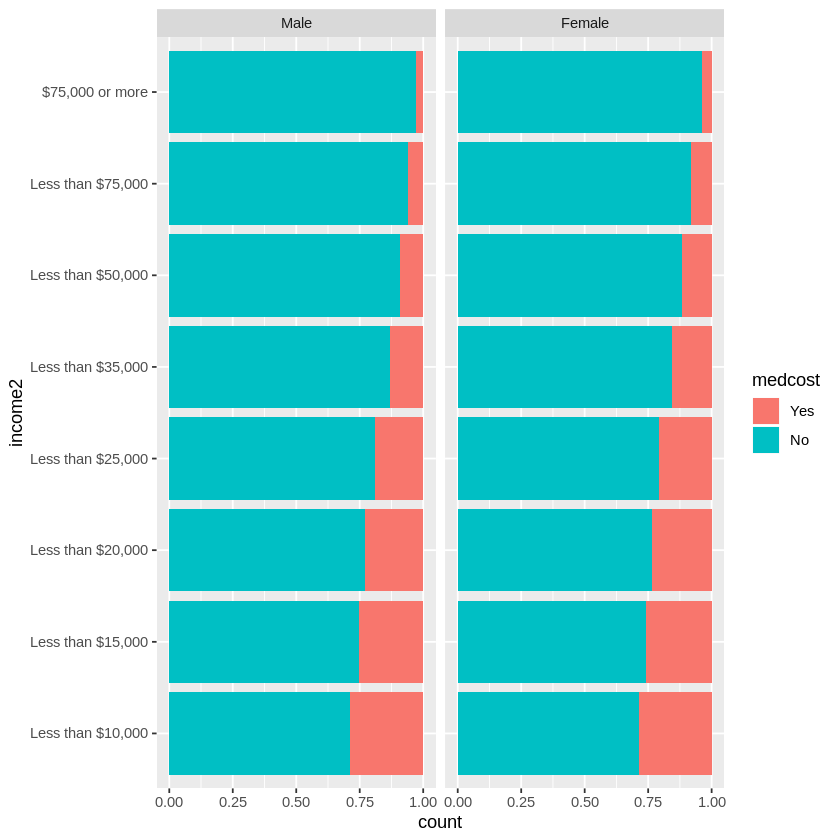

In [102]:
ggplot(med, aes(x=income2, fill=medcost))+geom_bar(position="fill") + coord_flip() + facet_wrap(~sex)

##### Summary Statistics

##### Narrative

In [105]:
group_dec <- (
    
    med %>% 
    select(income2, sex, medcost) %>%
    group_by(sex, medcost) %>% count(income2)
    
)

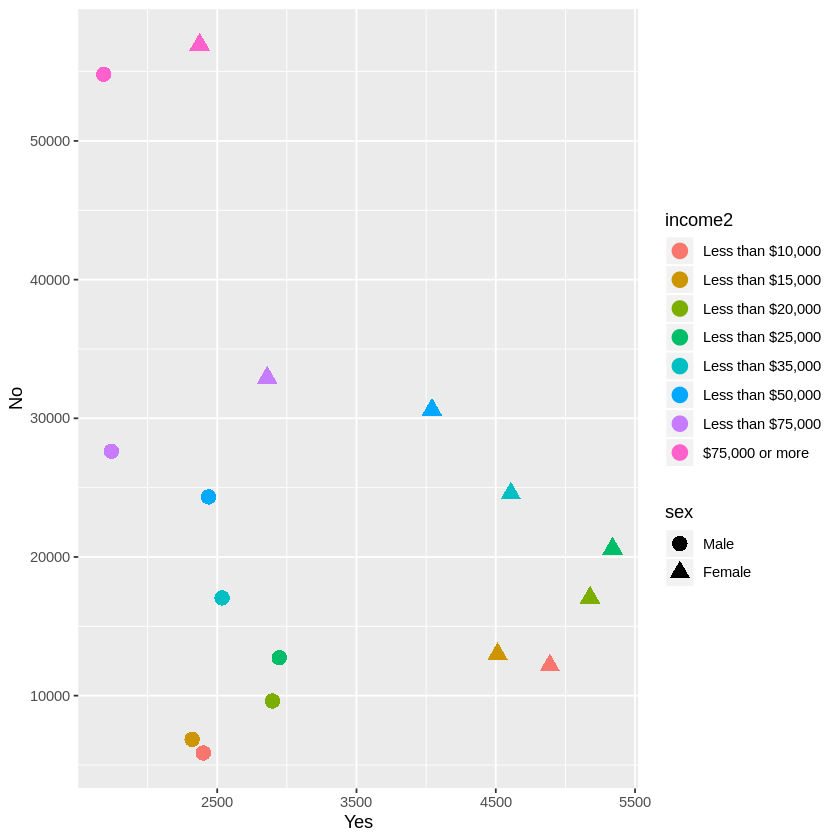

In [129]:
(
    group_dec %>% 
    spread(medcost, n) %>% 
    ggplot(aes(x=Yes, y=No, colour=income2)) + 
    geom_point(aes(shape=sex), size=4)
    
)